In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn import metrics, cluster
from sklearn.preprocessing import MinMaxScaler

def purity_score(y_true, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
X = df.drop('class', axis=1)
y = df['class']

X_scaled = MinMaxScaler().fit_transform(X)

for k in (2, 3, 4, 5):
    print("Clustering results with k =", k)

    kmeans_model = cluster.KMeans(n_clusters=k, random_state=0).fit(X_scaled)

    print("\tsilhouette:", metrics.silhouette_score(X_scaled, kmeans_model.labels_, metric='euclidean'))
    print("\tpurity:", purity_score(y, kmeans_model.labels_))

Clustering results with k = 2
	silhouette: 0.36044124340441114
	purity: 0.632258064516129
Clustering results with k = 3
	silhouette: 0.29579055730002257
	purity: 0.667741935483871
Clustering results with k = 4
	silhouette: 0.27442402122340176
	purity: 0.6612903225806451
Clustering results with k = 5
	silhouette: 0.23823928397844843
	purity: 0.6774193548387096


Comentar pergunta 1

In [3]:
from sklearn.decomposition import PCA
from pprint import pprint

pca = PCA(n_components=2, svd_solver='full')
pca.fit(X_scaled)
print("1st component explained variance ratio:", round(pca.explained_variance_ratio_[0], 5))
print("2nd component explained variance ratio:", round(pca.explained_variance_ratio_[1], 5))
print()

X_pca = pca.transform(X_scaled)

columns = X.columns.to_list()
for i in range(len(pca.components_)):
    axis_scaled = pca.components_[i] * max(X_pca[:,i])
    impt_features = {columns[i] : abs(axis_scaled[i]) for i in range(len(columns))}
    print(f"Features by importance on {'1st' if i == 0 else '2nd'} component:")
    pprint([(round(value[0], 5), value[1]) for value in sorted(zip(impt_features.values(), impt_features.keys()), reverse=True)])

1st component explained variance ratio: 0.56181
2nd component explained variance ratio: 0.20956

Features by importance on 1st component:
[(0.44394, 'pelvic_incidence'),
 (0.38651, 'lumbar_lordosis_angle'),
 (0.35046, 'pelvic_tilt'),
 (0.24439, 'sacral_slope'),
 (0.16278, 'degree_spondylolisthesis'),
 (0.08691, 'pelvic_radius')]
Features by importance on 2nd component:
[(0.37797, 'pelvic_tilt'),
 (0.32762, 'pelvic_radius'),
 (0.24994, 'sacral_slope'),
 (0.0564, 'pelvic_incidence'),
 (0.04513, 'lumbar_lordosis_angle'),
 (0.00258, 'degree_spondylolisthesis')]


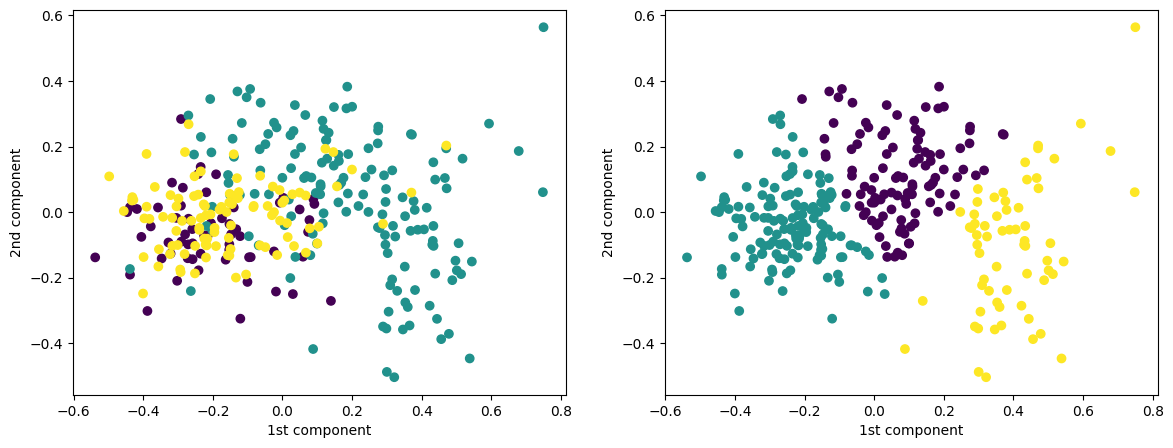

In [4]:
import matplotlib.pyplot as plt

kmeans_model = cluster.KMeans(n_clusters=3, random_state=0).fit(X_pca)

classes = ('Hernia', 'Spondylolisthesis', 'Normal')
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[classes.index(label) for label in y])
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_model.labels_)
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

Pergunta 4